<a href="https://colab.research.google.com/github/norannali/Titanic-Analysis/blob/main/titanic_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from collections import Counter

# **1-Load Data**

In [ ]:
train_df=pd.read_csv('/kaggle/input/titanic/train.csv')
test_df=pd.read_csv('/kaggle/input/titanic/test.csv')

# **2-Explore Data**

In [ ]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# **Variable Description**


1.  PassengerId: unique id number to each passenger,
2. Survived: passenger survive(1) or died(0),
3. Pclass: passenger class
4. Name: name
5. Sex: gender of passenger
6. Age: age of passenger
7. SibSp: number of siblings/spouses
8. Parch: number of parents/children
9. Ticket: ticket number
10. Fare: amount of money spent on ticket
11. Cabin: cabin category
12. Embarked: port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)

train_df.describe()

In [ ]:
train_df.info()
print('-'*50)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0  

int64:[PassengerId,Parch,Survived,Pclass,SibSp]

float64:[Age,Fare]

object:[Name,Sex,Cabin,Embarked,Ticket]

In [ ]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train_df.shape

(891, 12)

In [ ]:
null_values=train_df.isnull().sum()
null_values[null_values>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

<Axes: >

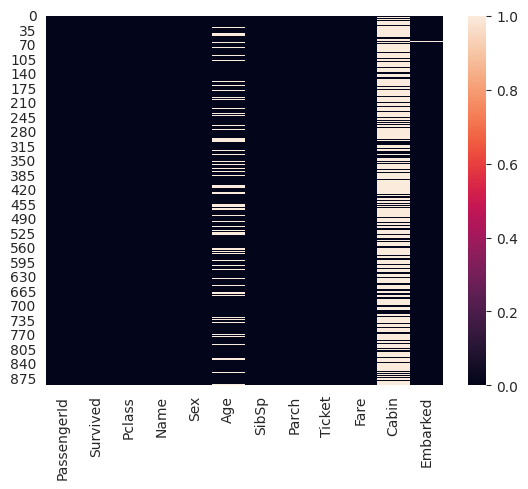

In [ ]:
sns.heatmap(train_df.isnull())

# **Variable Description**

Categorical Variable: Survived, Sex, Pclass, Embarked, Cabin, Name, Ticket, Sibsp and Parch

Numerical Variable: Fare, age and passengerId

In [ ]:
def bar_plot(variable):
    # Get feature
    var = train_df[variable]
    # Count the number of occurrences for each category
    varValue = var.value_counts()
    # Visualize
    plt.figure(figsize=(10, 5))
    plt.bar(
        varValue.index,
        varValue,
        color='skyblue',
        edgecolor='black',
        alpha=0.8
    )
    # Customize ticks and labels
    plt.xticks(varValue.index, varValue.index.values, fontsize=12, rotation=45, color='darkblue')
    plt.ylabel("Frequency", fontsize=14, color='darkblue')
    plt.title(f"Distribution of {variable}", fontsize=16, color='darkred')
    plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add a grid for better readability
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

    # Print variable details
    print(f"{variable}: \n{varValue}")


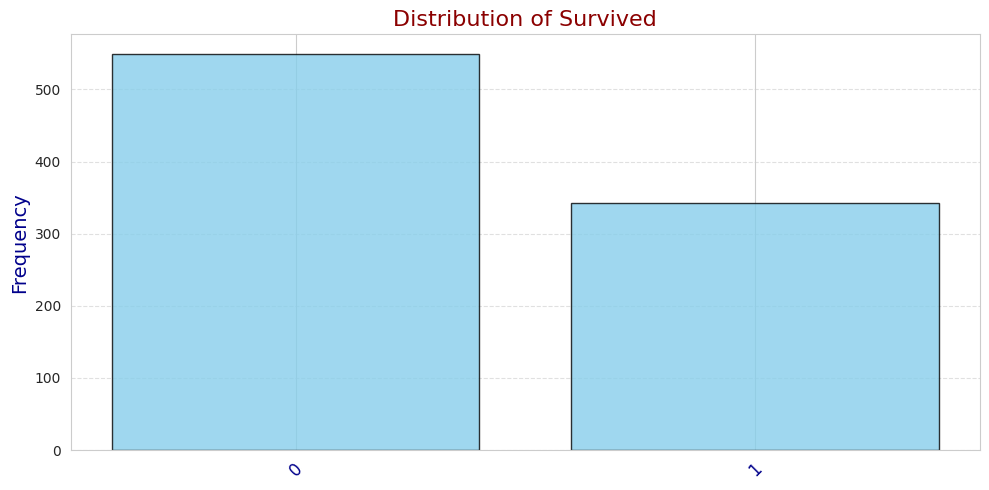

Survived: 
Survived
0    549
1    342
Name: count, dtype: int64


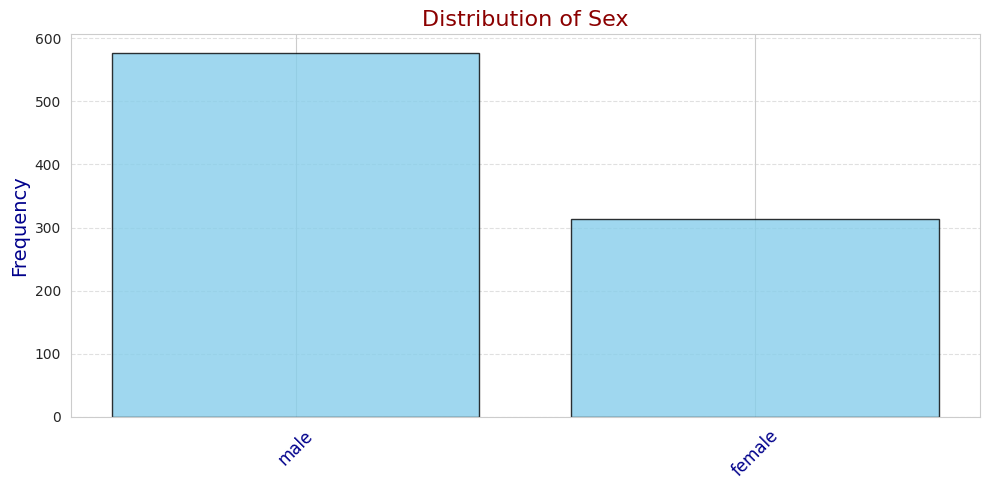

Sex: 
Sex
male      577
female    314
Name: count, dtype: int64


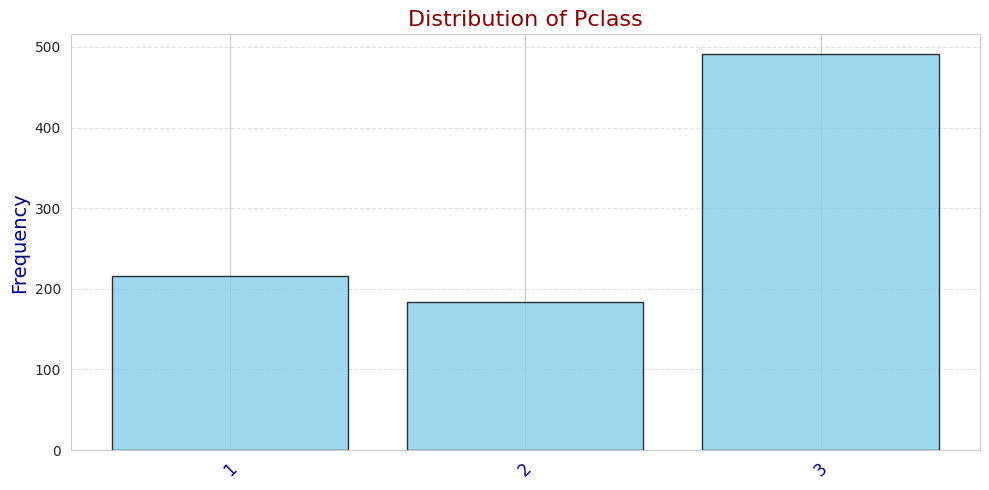

Pclass: 
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


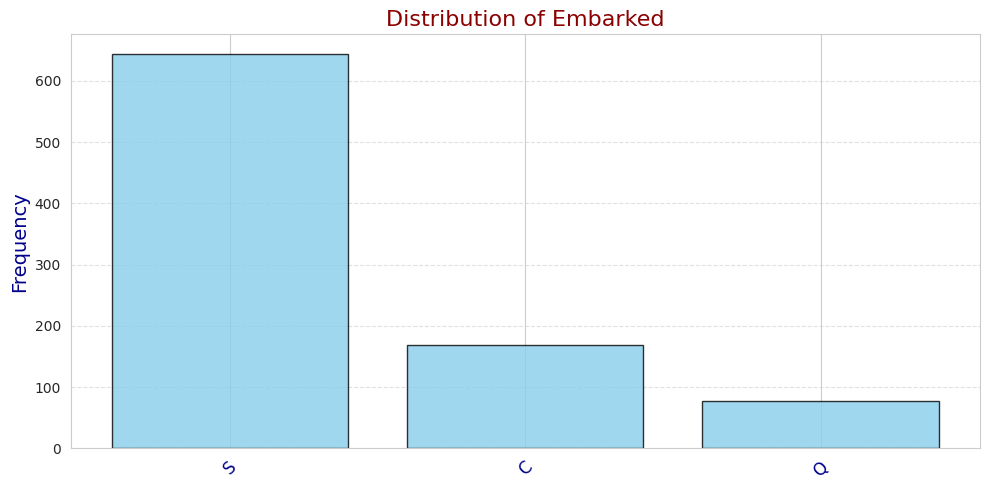

Embarked: 
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


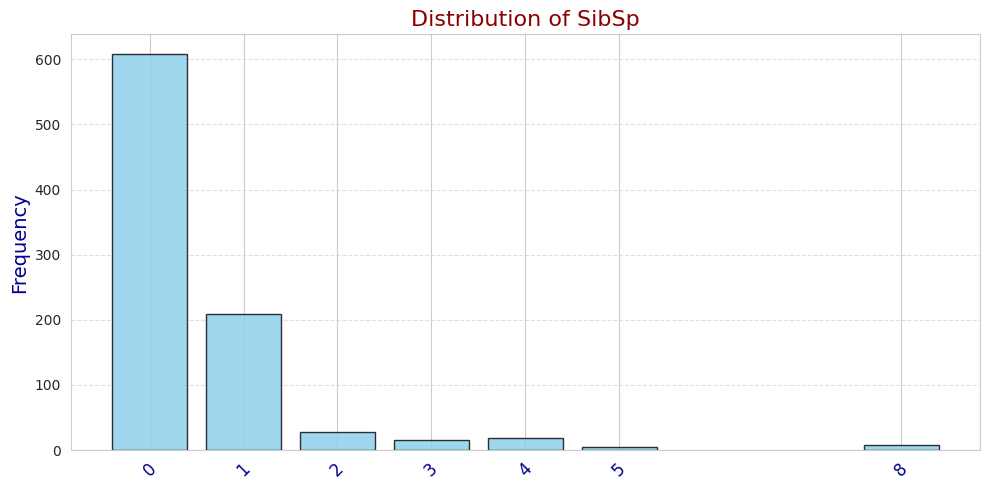

SibSp: 
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


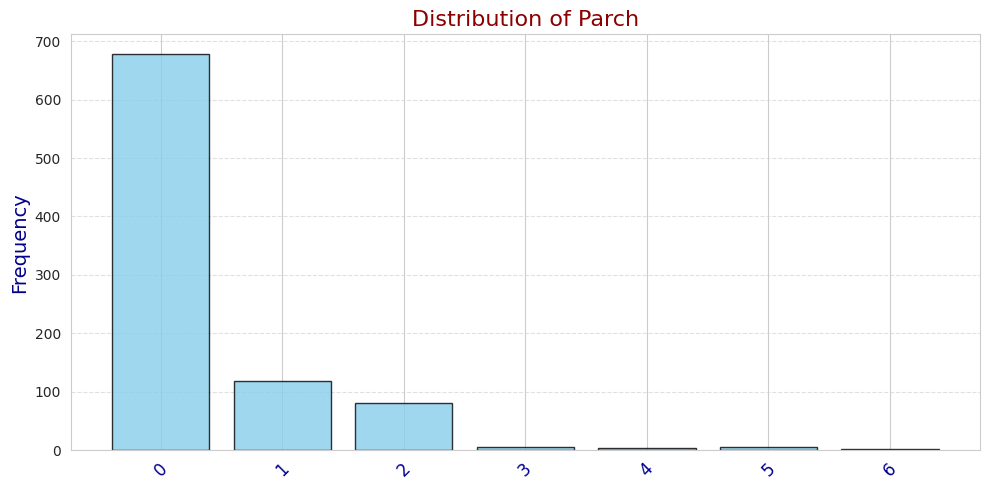

Parch: 
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


In [ ]:
categorical_col=["Survived","Sex","Pclass","Embarked","SibSp", "Parch"]
for col in categorical_col:
    bar_plot(col)

In [ ]:
cat_col2=["Cabin", "Name", "Ticket"]
for col in cat_col2:
    print("{} \n".format(train_df[col].value_counts()))

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64 

Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64 

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64 



In [ ]:
def plot_hist(variable):
    plt.figure(figsize=(10, 5))
    plt.hist(
        train_df[variable],
        bins=30,
        color='skyblue',
        edgecolor='black',
        alpha=0.7
    )
    plt.xlabel(variable, fontsize=14, color='darkblue')
    plt.ylabel("Frequency", fontsize=14, color='darkblue')
    plt.title("{} Distribution".format(variable), fontsize=16, color='darkred')
    plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add a grid for better readability
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

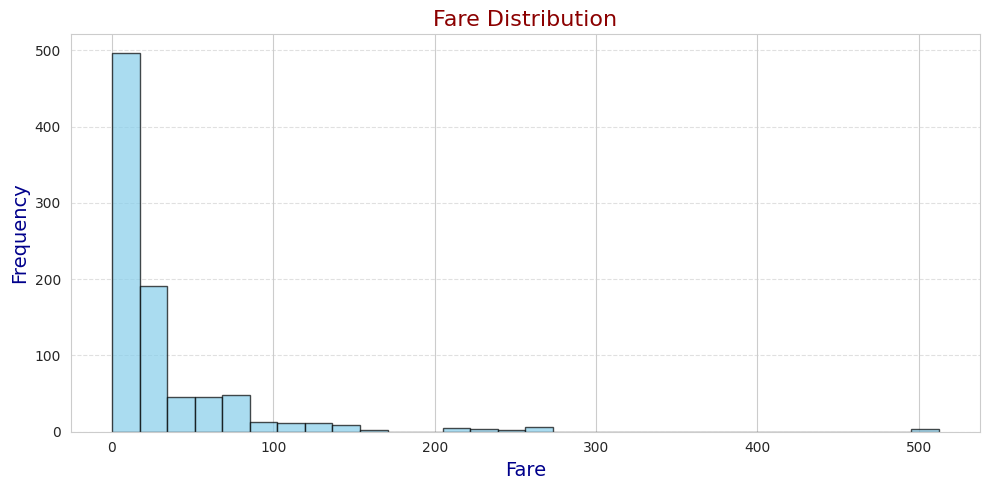

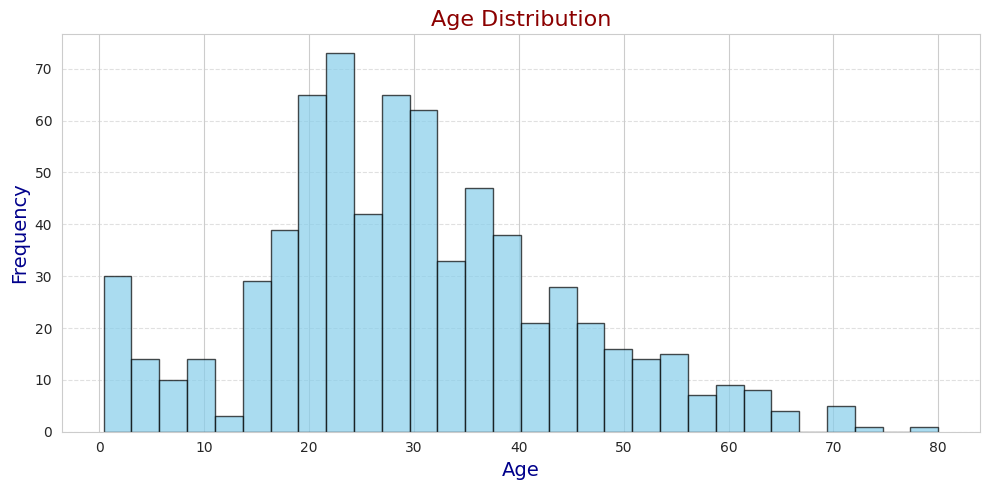

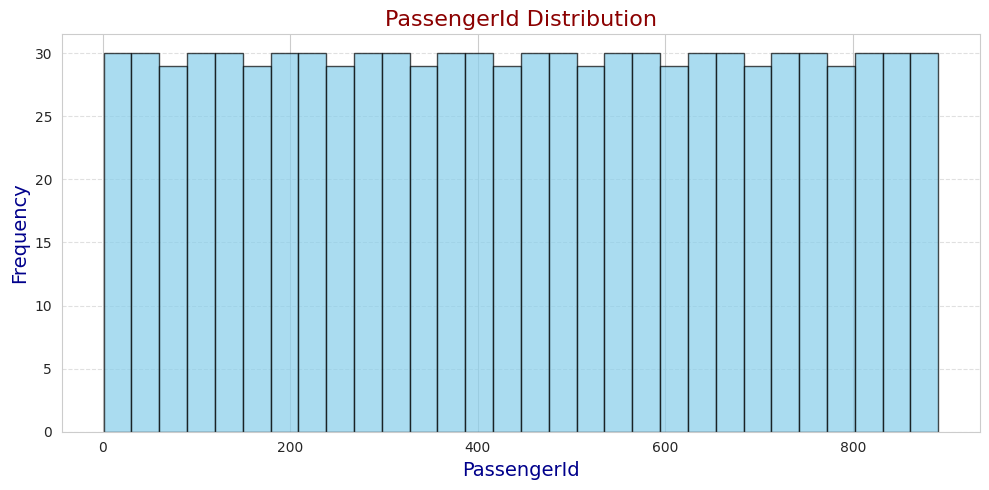

In [ ]:
numeric_col=["Fare", "Age","PassengerId"]
for col in numeric_col:
    plot_hist(col)

In [ ]:
# Pclass vs Survived
train_df[["Pclass","Survived"]].groupby(["Pclass"],as_index=False).mean().sort_values(by="Survived",ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
#Sex vs Survived
train_df[["Sex","Survived"]].groupby(["Sex"],as_index=False).mean().sort_values(by="Survived",ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
#SibSp vs Survived
train_df[["SibSp","Survived"]].groupby(["SibSp"],as_index=False).mean().sort_values(by="Survived",ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
# Parch vs Survived
train_df[["Parch","Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [ ]:
def detect_outliers(df, features):
    outlier_indices = []

    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c], 25)
        # 3rd quartile
        Q3 = np.percentile(df[c], 75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # Detect outliers and their indices
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # Store indices
        outlier_indices.extend(outlier_list_col)

    # Count occurrences of each index
    outlier_indices = Counter(outlier_indices)
    # Keep indices that appear more than twice
    multiple_outliers = [i for i, v in outlier_indices.items() if v > 2]

    return multiple_outliers


In [ ]:
train_df.loc[detect_outliers(train_df,["Age","SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [ ]:
#drop outliers
train_df = train_df.drop(detect_outliers(train_df,["Age","SibSp","Parch","Fare"]),axis = 0).reset_index(drop = True)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  881 non-null    int64  
 1   Survived     881 non-null    int64  
 2   Pclass       881 non-null    int64  
 3   Name         881 non-null    object 
 4   Sex          881 non-null    object 
 5   Age          711 non-null    float64
 6   SibSp        881 non-null    int64  
 7   Parch        881 non-null    int64  
 8   Ticket       881 non-null    object 
 9   Fare         881 non-null    float64
 10  Cabin        201 non-null    object 
 11  Embarked     879 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 82.7+ KB


In [ ]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64

In [ ]:
train_dflen=len(train_df)
train_df=pd.concat([train_df,test_df],axis=0).reset_index(drop = True)

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

In [ ]:
train_df['Embarked'].value_counts()

Embarked
S    904
C    270
Q    123
Name: count, dtype: int64

In [ ]:
train_df["Embarked"].fillna("S", inplace=True)

In [ ]:
train_df['Fare'].value_counts()

Fare
8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
32.3208     1
8.4583      1
28.7125     1
15.0500     1
7.7208      1
Name: count, Length: 281, dtype: int64

In [ ]:
droped_Columns=['PassengerId','Name','Ticket','Cabin']
train_df=train_df.drop(droped_Columns,axis=1)

In [ ]:
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [ ]:
grouped_age=train_df.groupby('Survived')['Age'].mean()
grouped_age

Survived
0.0    30.653664
1.0    28.377326
Name: Age, dtype: float64

In [ ]:
survied_check=grouped_age[1]
train_df['Age'].fillna(survied_check, inplace=True)

In [ ]:
unsurvied_check=grouped_age[0]
train_df['Age'].fillna(unsurvied_check, inplace=True)

In [ ]:
train_df.head(n=10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,male,22.000000,1,0,7.2500,S
1,1.0,1,female,38.000000,1,0,71.2833,C
2,1.0,3,female,26.000000,0,0,7.9250,S
3,1.0,1,female,35.000000,1,0,53.1000,S
4,0.0,3,male,35.000000,0,0,8.0500,S
5,0.0,3,male,28.377326,0,0,8.4583,Q
6,0.0,1,male,54.000000,0,0,51.8625,S
7,0.0,3,male,2.000000,3,1,21.0750,S
8,1.0,3,female,27.000000,0,2,11.1333,S
9,1.0,2,female,14.000000,1,0,30.0708,C


In [ ]:
#Fare column Skwed right so we fill null values with median
median_fare = train_df["Fare"].median()
train_df["Fare"].fillna(median_fare, inplace=True)

In [ ]:
train_df.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

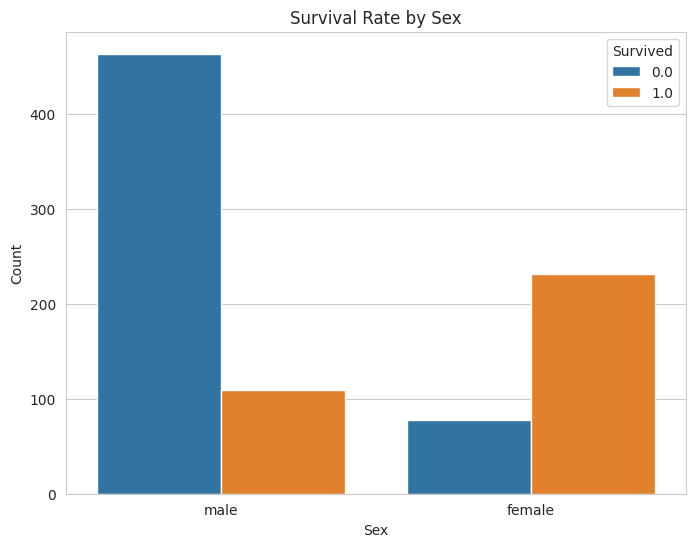

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='Sex', hue='Survived')
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


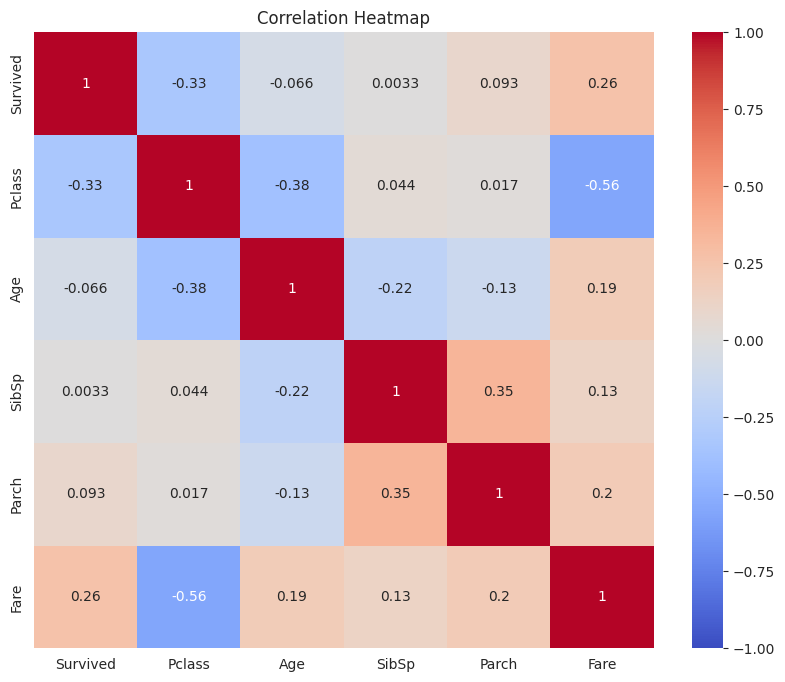

In [ ]:
#correlation between numeric variables
# Select only numeric columns
numeric_df = train_df.select_dtypes(include=[float, int])
# Calculate the correlation
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

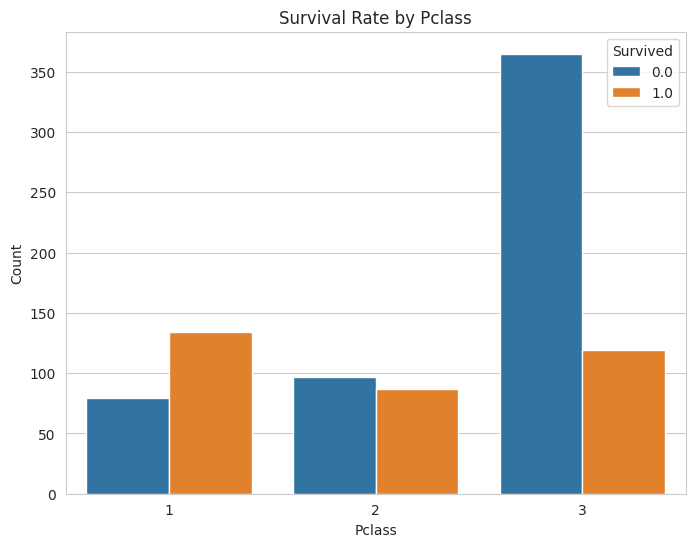

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='Pclass', hue='Survived')
plt.title('Survival Rate by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


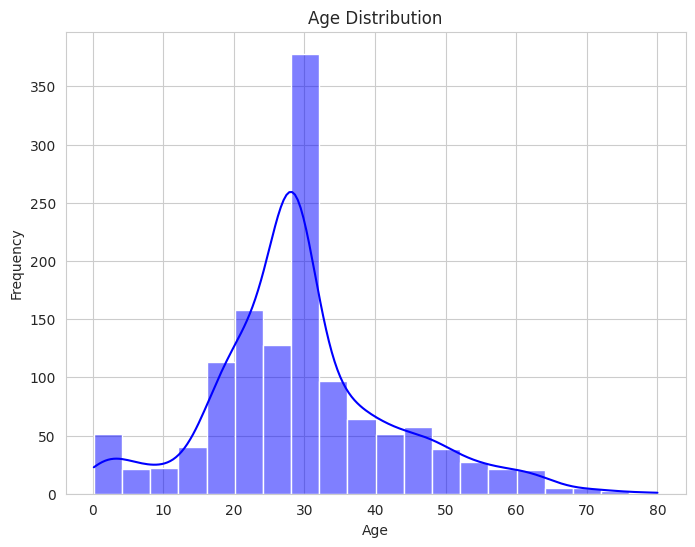

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(train_df['Age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


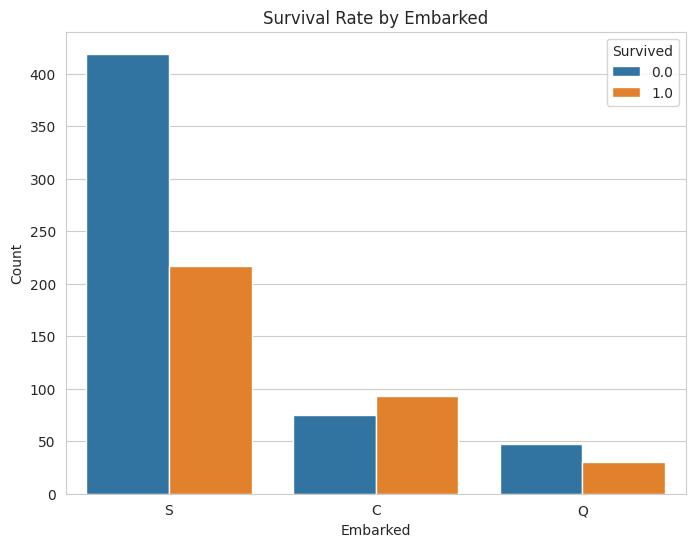

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='Embarked', hue='Survived')
plt.title('Survival Rate by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_df['Sex'] = label_encoder.fit_transform(train_df['Sex'])
train_df['Embarked'] = label_encoder.fit_transform(train_df['Embarked'])

In [ ]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,1,22.0,1,0,7.2500,2
1,1.0,1,0,38.0,1,0,71.2833,0
2,1.0,3,0,26.0,0,0,7.9250,2
3,1.0,1,0,35.0,1,0,53.1000,2
4,0.0,3,1,35.0,0,0,8.0500,2
